In [32]:
#Importing Libraries and loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime

# Load dataset
df = pd.read_csv("data.csv")

# Preview the data
print(df.head())




  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


**Data Cleaning**

In [33]:
#checking the null values
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [34]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [35]:
# Calculating the Percentage of null values
null_percent = df.isnull().sum() / len(df) * 100
print(null_percent)


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [36]:
# Droping rows with null values in 'Description'
df = df.dropna(subset=['Description'])

# Verifying nulls are dropped
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64


In [37]:
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


In [39]:
# Converting 'Unknown' back to NaN
df['CustomerID'] = df['CustomerID'].replace('Unknown', pd.NA)

# Calculating the median
customer_id_median = df['CustomerID'].median()

# Replacing NaN values with the median
df['CustomerID'].fillna(customer_id_median, inplace=True)

# Verifying the result
print(df['CustomerID'].isnull().sum())


0


<ipython-input-39-28600807034d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(customer_id_median, inplace=True)


In [40]:
#Managing the null values
df = df.dropna(subset=['InvoiceDate'])

df['UnitPrice'].fillna(df['UnitPrice'].median(), inplace=True)

df = df.dropna(subset=['Country'])

#All the Nulls values are Managed
df.isnull().sum()


<ipython-input-40-f95fe0627b27>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UnitPrice'].fillna(df['UnitPrice'].median(), inplace=True)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [41]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [42]:
#getting insights
# Calculating TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Converting InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', infer_datetime_format=True)

# Filtering out negative or zero quantities
df = df[df['Quantity'] > 0]

<ipython-input-42-a0724caab330>:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', infer_datetime_format=True)


In [43]:
#RFM ANALYSIS

# Defining snapshot date
snapshot_date = max(df['InvoiceDate']) + pd.Timedelta(days=1)

# RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                     # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm.describe())


         CustomerID      Recency      Frequency      Monetary
count   4339.000000  4339.000000    4339.000000  4.339000e+03
mean   15299.936852    92.516248     121.102097  2.447565e+03
std     1721.889758   100.011553    2030.298587  2.783623e+04
min    12346.000000     1.000000       1.000000  0.000000e+00
25%    13812.500000    18.000000      17.000000  3.064550e+02
50%    15299.000000    51.000000      41.000000  6.685600e+02
75%    16778.500000   142.000000      98.000000  1.660315e+03
max    18287.000000   374.000000  133001.000000  1.737523e+06


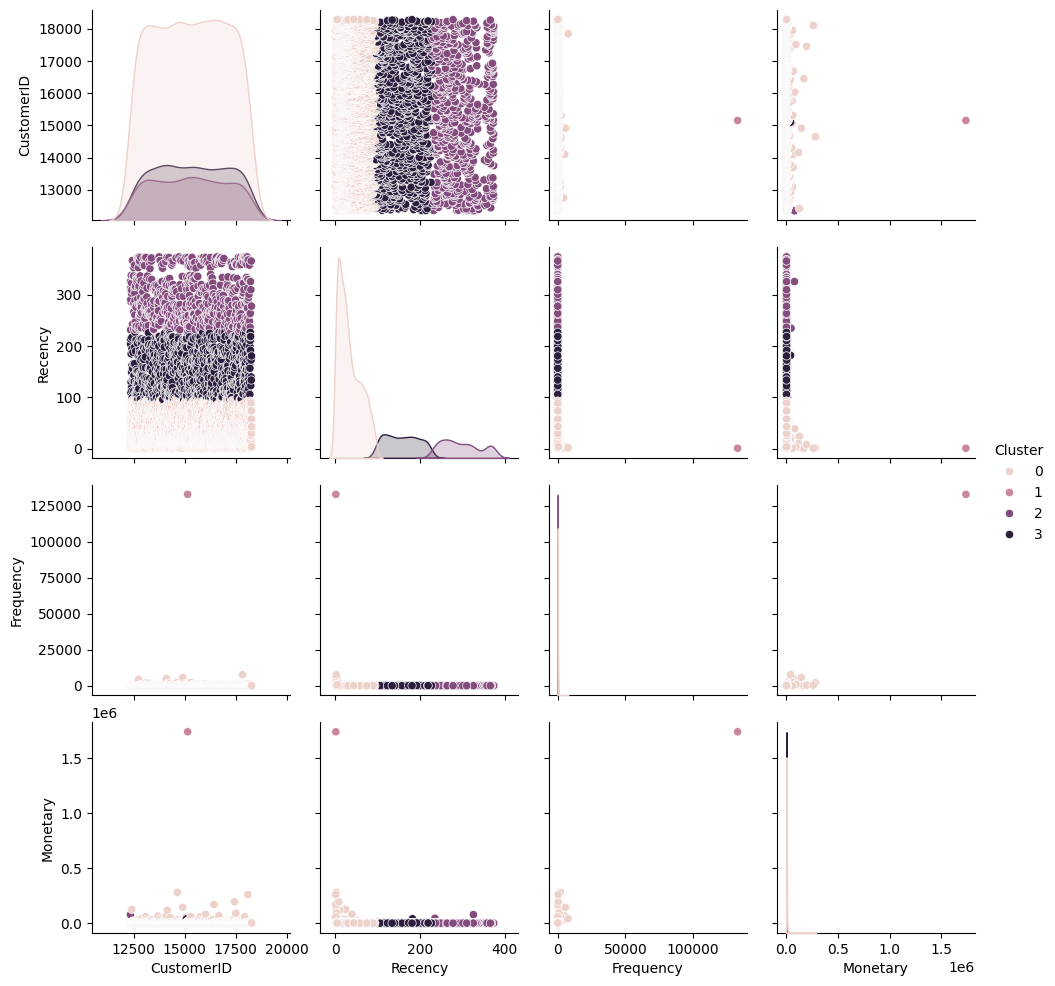

In [44]:
#Clustering with K-Means

from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Applying K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualizing the clusters
sns.pairplot(rfm, hue='Cluster', diag_kind='kde')
plt.show()


**Visualization and Insights**

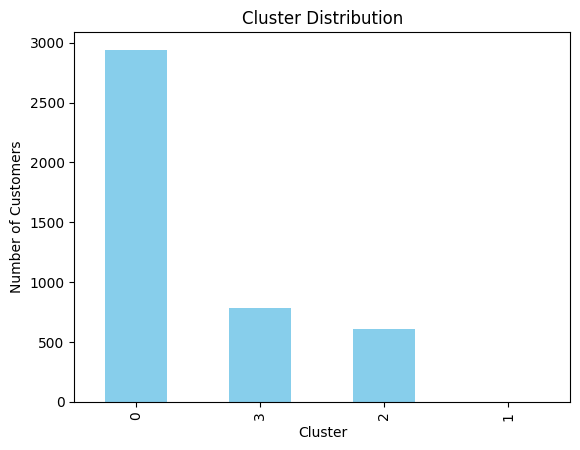

In [45]:
#Cluster Distribution
rfm['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


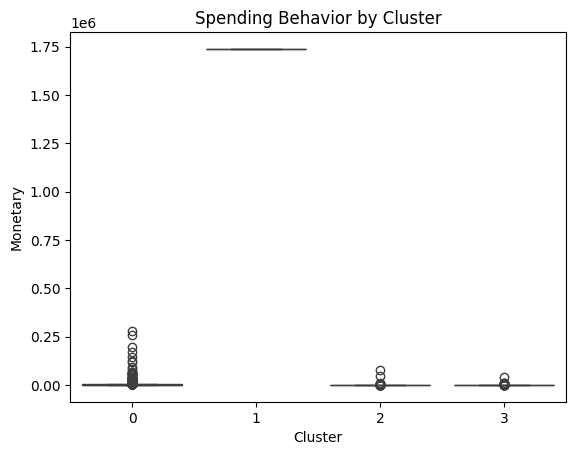

In [46]:
#Spending Behavior by Cluster:
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Spending Behavior by Cluster')
plt.show()


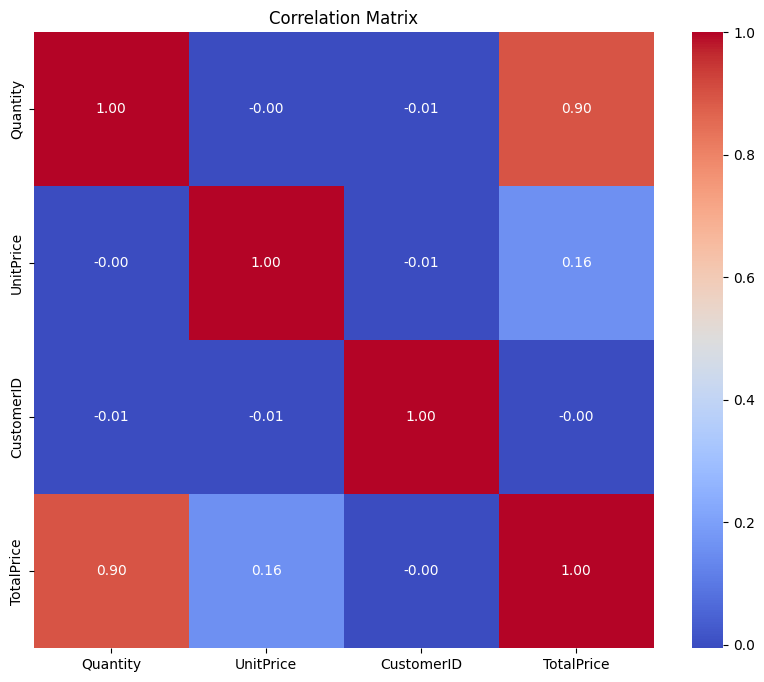

In [47]:
#CORRELATION MATRIX

# Selecting only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number']).columns

# Computing the correlation matrix on numeric columns only
corr_matrix = df[numeric_columns].corr()

# Ploting the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



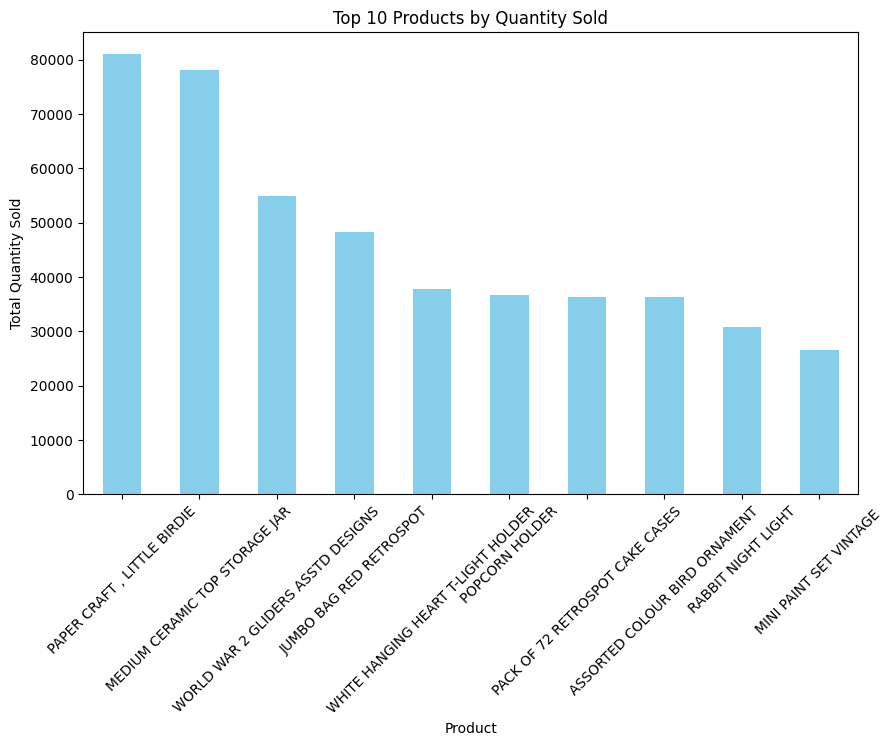

In [48]:
#TOP PRODUCTS BY QUANTITY SOLD

# Grouping by 'Description' (product) and sum the 'Quantity'
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products
top_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()



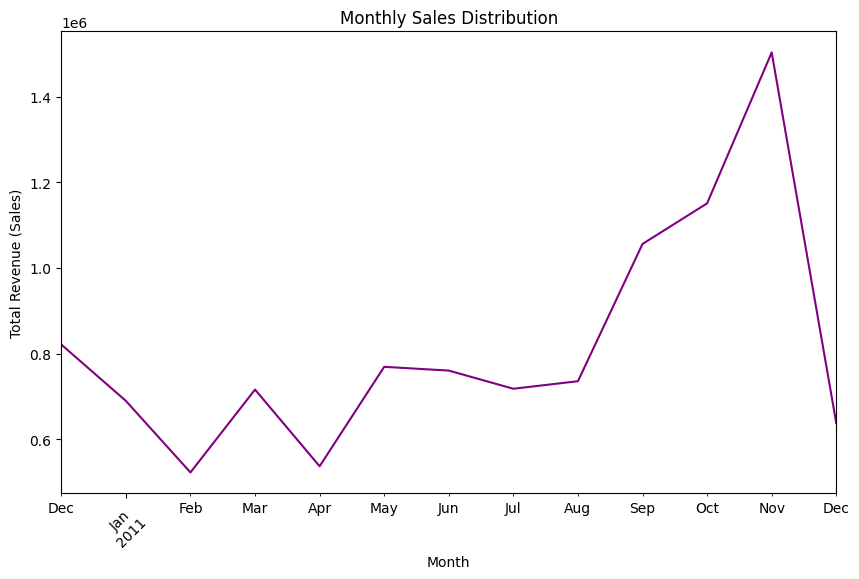

In [49]:
# Calculate Revenue (Sales) = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by Month and Year and sum the Revenue (Sales)
sales_by_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

# Plot the sales distribution over time by month

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', color='purple')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Sales)')
plt.xticks(rotation=45)
plt.show()
